In [231]:
#import all required libraries.
import numpy as np
import pandas as pd

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

### Step 1 : Reading and Understanding Data


In [232]:
#reading the data source.
bikeDemand= pd.read_csv("day.csv")
bikeDemand.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [233]:
# renaming few columns for better readibility
bikeDemand.rename(columns={'yr':'year','mnth':'month','atemp':'feelingtemp','hum':'humidity','cnt':'count'}, inplace=True)


In [234]:
bikeDemand.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,feelingtemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [235]:
#checking the size of the data.
bikeDemand.shape

(730, 16)

In [236]:
#get the info about columns like dtype.
bikeDemand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   instant      730 non-null    int64  
 1   dteday       730 non-null    object 
 2   season       730 non-null    int64  
 3   year         730 non-null    int64  
 4   month        730 non-null    int64  
 5   holiday      730 non-null    int64  
 6   weekday      730 non-null    int64  
 7   workingday   730 non-null    int64  
 8   weathersit   730 non-null    int64  
 9   temp         730 non-null    float64
 10  feelingtemp  730 non-null    float64
 11  humidity     730 non-null    float64
 12  windspeed    730 non-null    float64
 13  casual       730 non-null    int64  
 14  registered   730 non-null    int64  
 15  count        730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [237]:
#get the detail of the all columns.
bikeDemand.describe()

,instant,season,year,month,holiday,weekday,workingday,weathersit,temp,feelingtemp,humidity,windspeed,casual,registered,count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


 1) Size of the data is 730 row and 16 column.
 2) We have  one column as object type, while others are  either float or int.
 3) 

### Checking Data and values 

In [238]:
#check for null value if any.
bikeDemand.isnull().sum()

instant        0
dteday         0
season         0
year           0
month          0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
feelingtemp    0
humidity       0
windspeed      0
casual         0
registered     0
count          0
dtype: int64

There is no null value in any of the column in the dataset.

In [239]:
#check for duplication value in the dataset.
bikeDemand.duplicated().sum()

0

No duplicate row in the dataset.

In [240]:
#checking the values of the columns.
bike_dummy=bikeDemand.iloc[:,1:16]
for col in bike_dummy:
    print(bike_dummy[col].value_counts(ascending=False), '\n\n\n')

01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: dteday, Length: 730, dtype: int64 



3    188
2    184
1    180
4    178
Name: season, dtype: int64 



0    365
1    365
Name: year, dtype: int64 



1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: month, dtype: int64 



0    709
1     21
Name: holiday, dtype: int64 



6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64 



1    499
0    231
Name: workingday, dtype: int64 



1    463
2    246
3     21
Name: weathersit, dtype: int64 



26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: temp, Length: 498, dtype: int64 



32.73440    4
18.78105    3
31.85040    3
28.59875    2
23.32

#### Remove unwanted columns

In [241]:
newBikeDemand= bikeDemand.drop(['instant', 'dteday','casual','registered'], axis=1)

In [242]:
newBikeDemand.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,feelingtemp,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Step 2: Visualising the Data

In [243]:
import matplotlib.pyplot as plt
import seaborn as sns

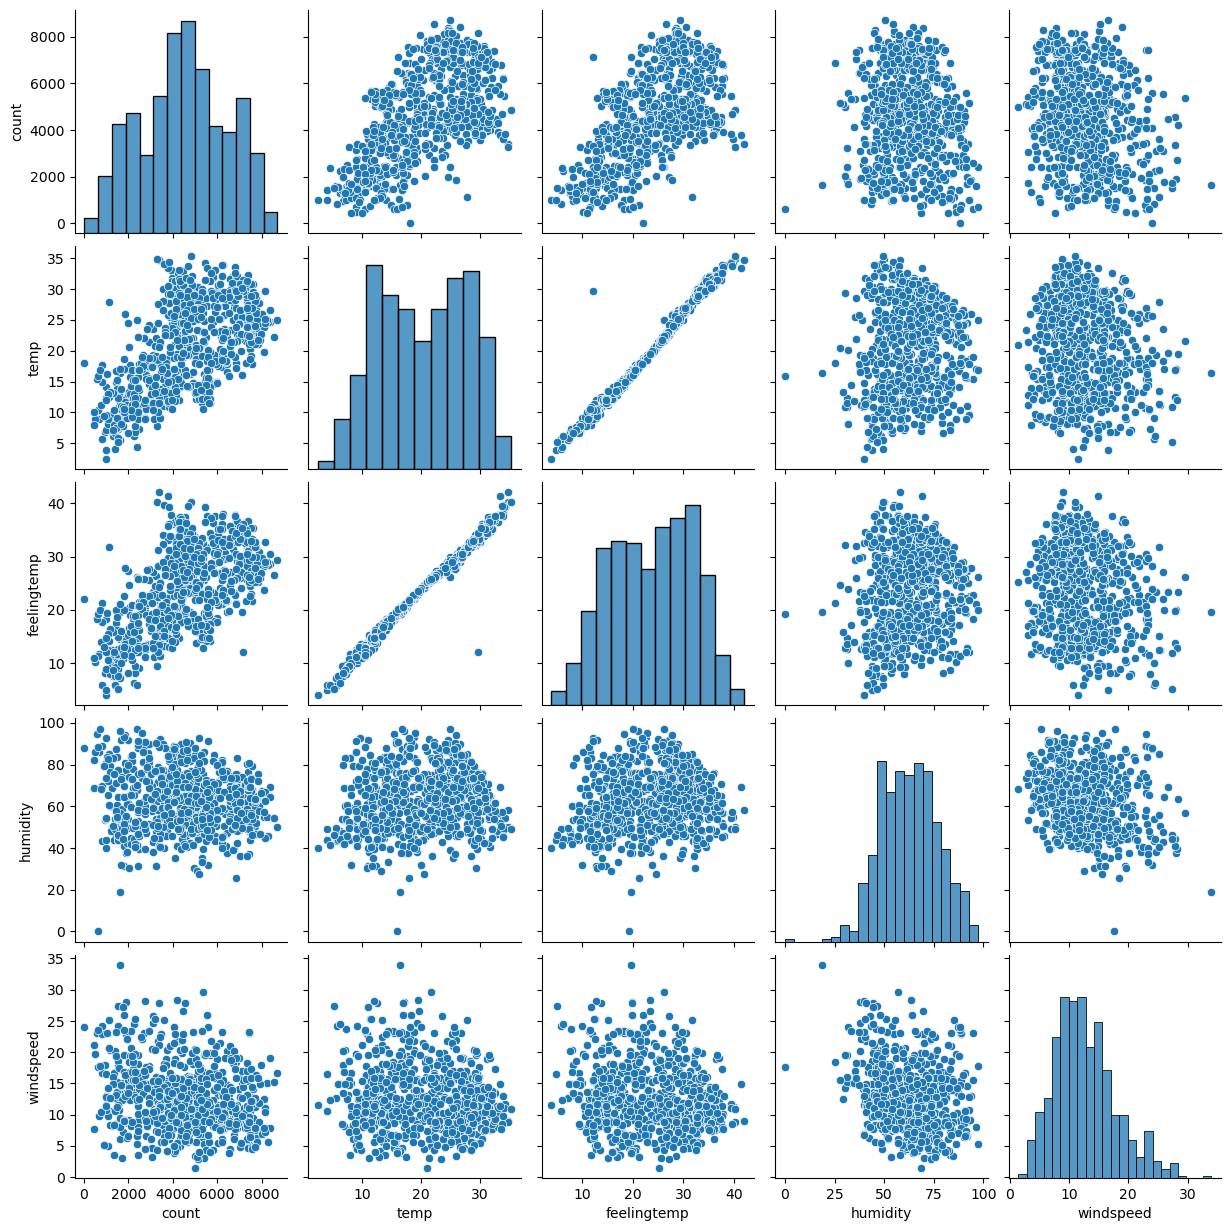

In [244]:
#visualise numerical variable
sns.pairplot(data=newBikeDemand, vars=['count','temp','feelingtemp','humidity','windspeed'])
plt.show()

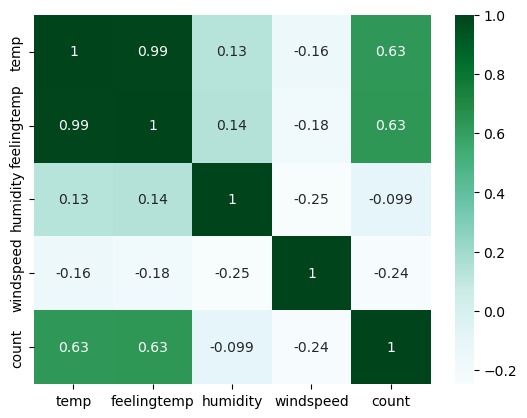

In [245]:
# Checking continuous variables relationship with each other
sns.heatmap(newBikeDemand[['temp','feelingtemp','humidity','windspeed','count']].corr(), cmap='BuGn', annot = True)
plt.show()

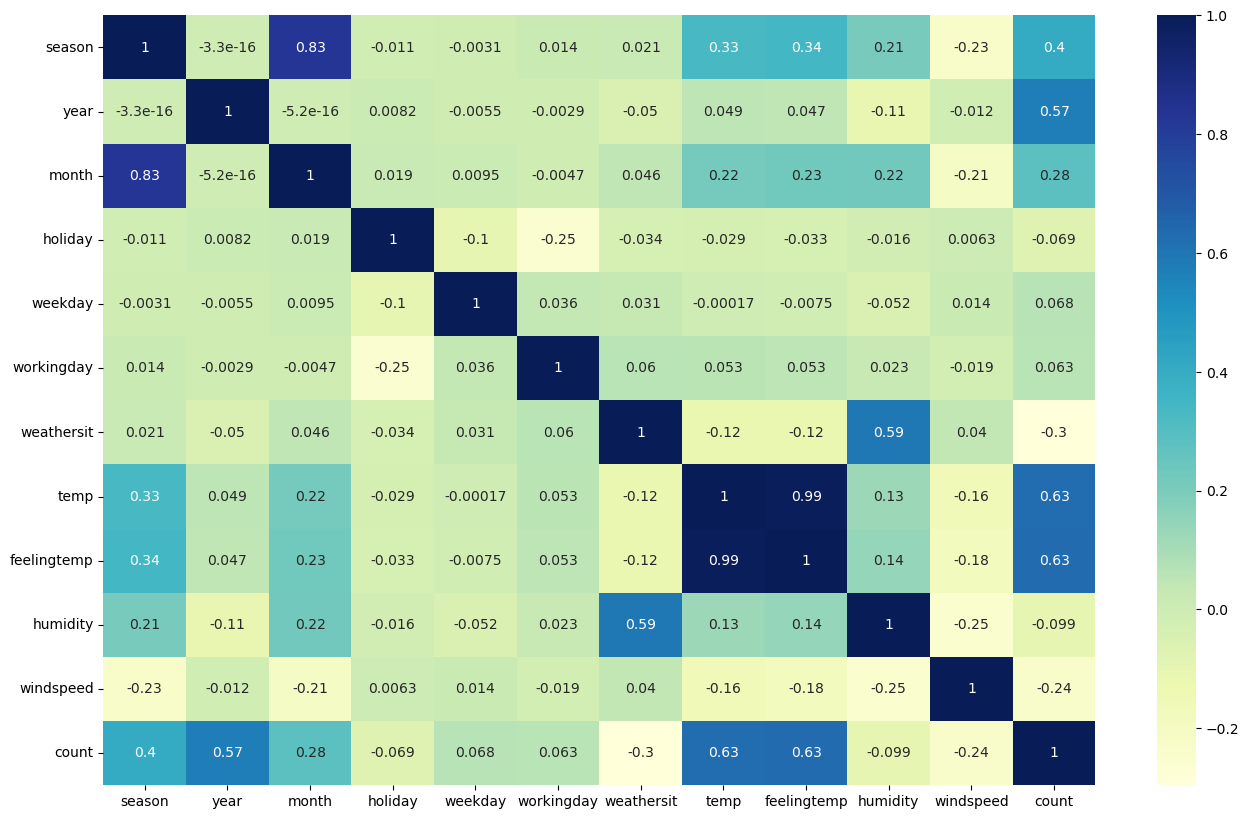

In [246]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(newBikeDemand.corr(), annot = True, cmap="YlGnBu")
plt.show()

##### Finding
As we can see in the charts, that temp and feelingtemp(atemp) has high corelation with the target variable.
In the correlation chart,temp and feelingtemp(atemp)- they have value of .99 which is almost equal to 1, which means they are highly corelated.

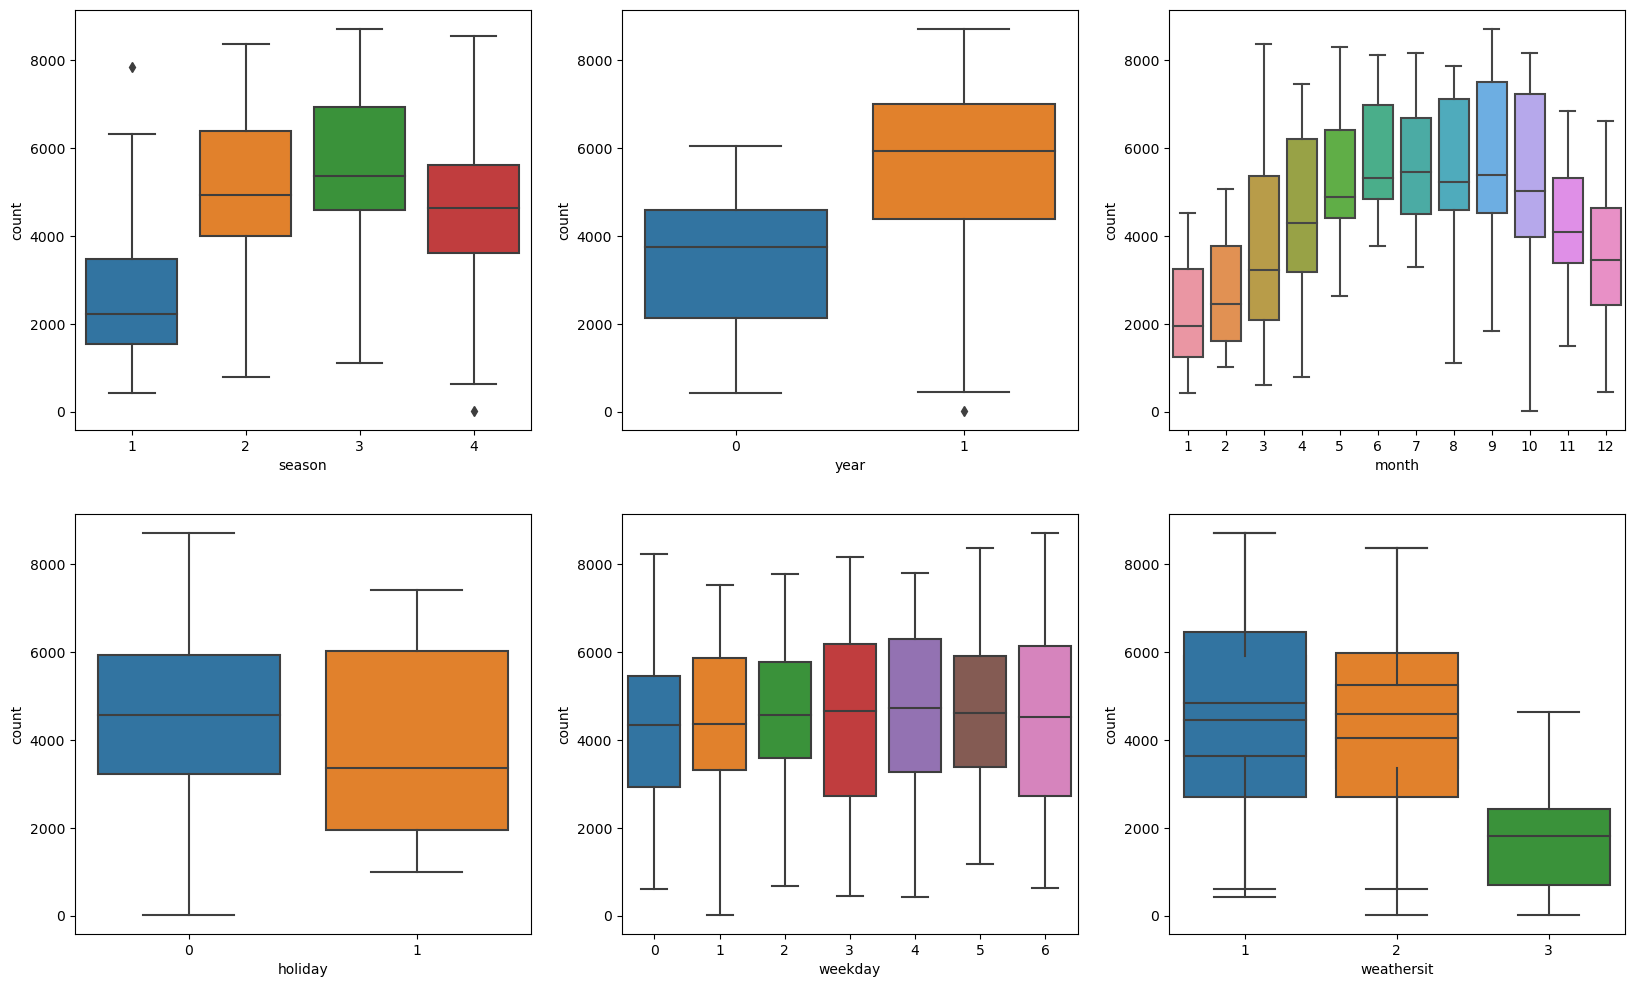

In [247]:
#visualise categorical variable. 
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'count', data = newBikeDemand)
plt.subplot(2,3,2)
sns.boxplot(x = 'year', y = 'count', data = newBikeDemand)
plt.subplot(2,3,3)
sns.boxplot(x = 'month', y = 'count', data = newBikeDemand)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'count', data = newBikeDemand)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'count', data = newBikeDemand)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'count', data = newBikeDemand)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'count', data = newBikeDemand)
plt.show()

#### Finding
As we can see in the charts, there are column which need to convert into the category value.
1) Season 3(fall) has highest demand among all the seasons
2) Year 1(2019) has more demand then the year 0(2018)
3) Demand increase as month increases till september after demand decreases.
4) Demand increase when day is holiday or weekend.
5) Clear weather has more demand.
6) weekday we dont have clear idea about this.

## Data Preprations

In [248]:
#Map the variable season to corresponding value
# Defining the map function
varlist=['season']
def season_map(x):
    return x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# Applying the function to the demand list
newBikeDemand[varlist] = newBikeDemand[varlist].apply(season_map)
newBikeDemand.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,feelingtemp,humidity,windspeed,count
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [249]:
#Map the variable month to corresponding value
# Defining the map function
varlist=['month']
def month_map(x):
    return x.map({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

# Applying the function to the demand list
newBikeDemand[varlist] = newBikeDemand[varlist].apply(month_map)
newBikeDemand.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,feelingtemp,humidity,windspeed,count
0,spring,0,jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [250]:
#Map the variable weather to corresponding value
# Defining the map function
varlist=['weathersit']
def weather_map(x):
    return x.map({1:'good',2:'moderate',3:'bad',4:'severe'})

# Applying the function to the demand list
newBikeDemand[varlist] = newBikeDemand[varlist].apply(weather_map)
newBikeDemand.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,feelingtemp,humidity,windspeed,count
0,spring,0,jan,0,6,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,0,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,1,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,2,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,3,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [251]:
#Map the variable weekday to corresponding value
# Defining the map function
varlist=['weekday']
def weekday_map(x):
    return x.map({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})

# Applying the function to the demand list
newBikeDemand[varlist] = newBikeDemand[varlist].apply(weekday_map)
newBikeDemand.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,feelingtemp,humidity,windspeed,count
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


### Dummy Variables

In [252]:
newBikeDemand.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,feelingtemp,humidity,windspeed,count
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [253]:
newBikeDemand = pd.get_dummies(data=newBikeDemand,columns=["season","month","weekday"], drop_first=True)
newBikeDemand = pd.get_dummies(data=newBikeDemand,columns=["weathersit"])
newBikeDemand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   feelingtemp          730 non-null    float64
 5   humidity             730 non-null    float64
 6   windspeed            730 non-null    float64
 7   count                730 non-null    int64  
 8   season_spring        730 non-null    uint8  
 9   season_summer        730 non-null    uint8  
 10  season_winter        730 non-null    uint8  
 11  month_aug            730 non-null    uint8  
 12  month_dec            730 non-null    uint8  
 13  month_feb            730 non-null    uint8  
 14  month_jan            730 non-null    uint8  
 15  month_jul            730 non-null    uin

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [254]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bikeDemand_train, bikeDemand_test = train_test_split(newBikeDemand, train_size = 0.7, test_size = 0.3, random_state = 100)

In [255]:
bikeDemand_test.head()

,year,holiday,workingday,temp,feelingtemp,humidity,windspeed,count,season_spring,season_summer,...,month_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,1,0,0,0,0,0,0,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,...,0,0,0,0,0,0,1,0,1,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,0,0,0,0,1,0,0,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,...,0,0,0,0,0,0,1,0,1,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,1,...,0,0,0,0,1,0,0,0,1,0


In [256]:
bikeDemand_train.head()

,year,holiday,workingday,temp,feelingtemp,humidity,windspeed,count,season_spring,season_summer,...,month_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,0,0,0,1,0,0,1,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,1,0,0,1,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,1,0,0,0,0,1,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,1,0,0,0,0,0,0,1


In [257]:
print(bikeDemand_test.shape)
print(bikeDemand_train.shape)


(219, 31)
(510, 31)


In [258]:
#rescaling the numerical columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [259]:
# Apply scaler() to all numerical the columns except 'dummy' variables
num_vars = ['temp','feelingtemp','humidity','windspeed','count']

bikeDemand_train[num_vars] = scaler.fit_transform(bikeDemand_train[num_vars])

In [260]:
bikeDemand_train.head()

,year,holiday,workingday,temp,feelingtemp,humidity,windspeed,count,season_spring,season_summer,...,month_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,1,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,1,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,1,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,1,0,0,0,0,0,0,1


In [261]:
bikeDemand_train.describe()

,year,holiday,workingday,temp,feelingtemp,humidity,windspeed,count,season_spring,season_summer,...,month_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.627451,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.483958,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [262]:
print(bikeDemand_test.columns)
print(bikeDemand_train.columns)
 

Index(['year', 'holiday', 'workingday', 'temp', 'feelingtemp', 'humidity',
       'windspeed', 'count', 'season_spring', 'season_summer', 'season_winter',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sept', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed', 'weathersit_bad',
       'weathersit_good', 'weathersit_moderate'],
      dtype='object')
Index(['year', 'holiday', 'workingday', 'temp', 'feelingtemp', 'humidity',
       'windspeed', 'count', 'season_spring', 'season_summer', 'season_winter',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sept', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed', 'weathersit_bad',
       'weathersit_good', 'weathersit_moderate'],
      dt

In [263]:
y_train = bikeDemand_train.pop('count')
X_train = bikeDemand_train

## Step 5: Building a linear model

# RFE
Recursive feature elimination

In [264]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [265]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [266]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', False, 2),
 ('feelingtemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', False, 2),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('month_aug', True, 1),
 ('month_dec', False, 2),
 ('month_feb', False, 2),
 ('month_jan', False, 2),
 ('month_jul', False, 2),
 ('month_jun', False, 2),
 ('month_mar', False, 2),
 ('month_may', False, 2),
 ('month_nov', False, 2),
 ('month_oct', False, 2),
 ('month_sept', True, 1),
 ('weekday_mon', False, 2),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 2),
 ('weekday_tue', False, 2),
 ('weekday_wed', False, 2),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [267]:
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'workingday', 'feelingtemp', 'humidity', 'windspeed',
       'season_summer', 'season_winter', 'month_aug', 'month_sept',
       'weekday_sat', 'weekday_sun', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

#### Model 1

In [268]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [269]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary());

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.5
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          9.74e-189
Time:                        22:41:56   Log-Likelihood:                 508.10
No. Observations:                 510   AIC:                            -988.2
Df Residuals:                     496   BIC:                            -928.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0620    

In [270]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,holiday,inf
3,workingday,inf
11,weekday_sat,inf
12,weekday_sun,inf
13,weathersit_bad,inf
14,weathersit_good,inf
15,weathersit_moderate,inf
5,humidity,1.88
4,feelingtemp,1.52
9,month_aug,1.41


In [271]:
X_train_rfe.columns

Index(['const', 'year', 'holiday', 'workingday', 'feelingtemp', 'humidity',
       'windspeed', 'season_summer', 'season_winter', 'month_aug',
       'month_sept', 'weekday_sat', 'weekday_sun', 'weathersit_bad',
       'weathersit_good', 'weathersit_moderate'],
      dtype='object')

#### Model 2

In [272]:
# Adding a constant variable 
X_train_rfe = X_train_rfe.drop(['const','weekday_sun'], axis=1)

import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm2 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.5
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          9.74e-189
Time:                        22:41:56   Log-Likelihood:                 508.10
No. Observations:                 510   AIC:                            -988.2
Df Residuals:                     496   BIC:                            -928.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0660    

In [273]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif            

,Features,VIF
12,weathersit_bad,inf
13,weathersit_good,inf
14,weathersit_moderate,inf
3,workingday,1.88
5,humidity,1.88
11,weekday_sat,1.78
4,feelingtemp,1.52
9,month_aug,1.41
7,season_summer,1.38
8,season_winter,1.31


#### Model 3

In [274]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train_rfe.drop(['const','weathersit_good'], axis=1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm3 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.5
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          9.74e-189
Time:                        22:41:56   Log-Likelihood:                 508.10
No. Observations:                 510   AIC:                            -988.2
Df Residuals:                     496   BIC:                            -928.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1860    

In [275]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,53.07
3,workingday,1.88
5,humidity,1.88
11,weekday_sat,1.78
13,weathersit_moderate,1.57
4,feelingtemp,1.52
9,month_aug,1.41
7,season_summer,1.38
8,season_winter,1.31
12,weathersit_bad,1.24


In [276]:
X_train_rfe.columns

Index(['const', 'year', 'holiday', 'workingday', 'feelingtemp', 'humidity',
       'windspeed', 'season_summer', 'season_winter', 'month_aug',
       'month_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_moderate'],
      dtype='object')

#### Model 4

In [277]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train_rfe.drop(['humidity'], axis=1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm4 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     209.6
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          1.18e-185
Time:                        22:41:56   Log-Likelihood:                 497.99
No. Observations:                 510   AIC:                            -970.0
Df Residuals:                     497   BIC:                            -914.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0873    

In [278]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [279]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,feelingtemp,6.12
2,workingday,4.38
4,windspeed,3.56
0,year,2.02
5,season_summer,1.82
9,weekday_sat,1.77
7,month_aug,1.55
6,season_winter,1.54
11,weathersit_moderate,1.54
8,month_sept,1.30


In [280]:
X_train_rfe.columns

Index(['year', 'holiday', 'workingday', 'feelingtemp', 'windspeed',
       'season_summer', 'season_winter', 'month_aug', 'month_sept',
       'weekday_sat', 'weathersit_bad', 'weathersit_moderate'],
      dtype='object')

#### Model 5

In [281]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe_new = X_train_rfe[['year', 'workingday', 'feelingtemp', 'windspeed',
       'season_summer', 'season_winter', 'month_sept',
       'weekday_sat', 'weathersit_bad', 'weathersit_moderate']]
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe_new = sm.add_constant(X_train_rfe_new)
lm5 = sm.OLS(y_train,X_train_rfe_new).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.3
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          5.77e-184
Time:                        22:41:56   Log-Likelihood:                 488.33
No. Observations:                 510   AIC:                            -954.7
Df Residuals:                     499   BIC:                            -908.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0714    

In [282]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_new.values, i) for i in range(X_train_rfe_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,21.32
2,workingday,1.64
8,weekday_sat,1.63
3,feelingtemp,1.20
5,season_summer,1.19
6,season_winter,1.19
4,windspeed,1.10
7,month_sept,1.10
9,weathersit_bad,1.05
10,weathersit_moderate,1.04


## Step 6: Residual Analysis of the train data

In [534]:
y_train_count = lm5.predict(X_train_rfe_new)

In [535]:
y_train_count.shape

(510,)

Text(0.5, 0, 'Errors')

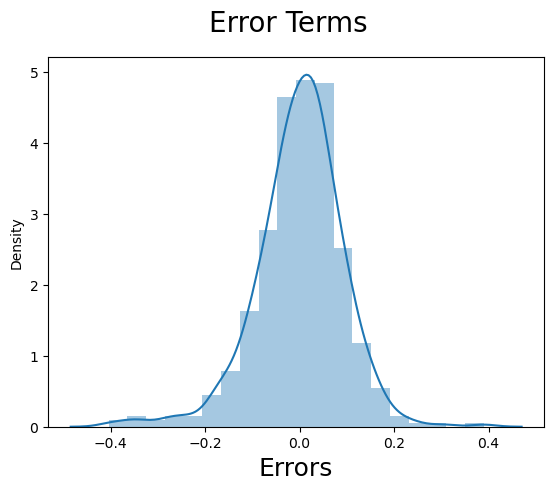

In [288]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

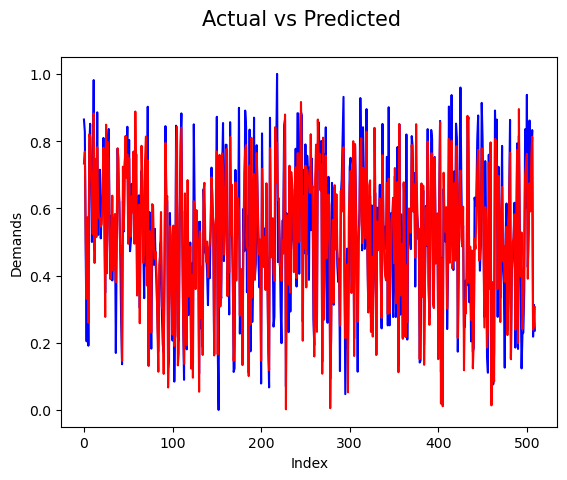

In [289]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_count, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

In [536]:
from sklearn.metrics import r2_score
r2_score(y_true=y_train,y_pred=y_train_count)

0.8286397205341678

## Step 7: Making Predictions


#### Applying the scaling on the test sets

In [290]:
num_vars = ['temp','feelingtemp','humidity','windspeed','count']

bikeDemand_test[num_vars] = scaler.transform(bikeDemand_test[num_vars])

In [291]:
bikeDemand_test.head()

,year,holiday,workingday,temp,feelingtemp,humidity,windspeed,count,season_spring,season_summer,...,month_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,1,0,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,1,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,1,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,1,0,1,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,1,0,0,0,1,0


In [292]:
bikeDemand_test.columns

Index(['year', 'holiday', 'workingday', 'temp', 'feelingtemp', 'humidity',
       'windspeed', 'count', 'season_spring', 'season_summer', 'season_winter',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sept', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed', 'weathersit_bad',
       'weathersit_good', 'weathersit_moderate'],
      dtype='object')

#### Dividing into X_test and y_test

In [293]:
y_test = bikeDemand_test.pop('count')
X_test = bikeDemand_test

In [294]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 219 non-null    int64  
 1   holiday              219 non-null    int64  
 2   workingday           219 non-null    int64  
 3   temp                 219 non-null    float64
 4   feelingtemp          219 non-null    float64
 5   humidity             219 non-null    float64
 6   windspeed            219 non-null    float64
 7   season_spring        219 non-null    uint8  
 8   season_summer        219 non-null    uint8  
 9   season_winter        219 non-null    uint8  
 10  month_aug            219 non-null    uint8  
 11  month_dec            219 non-null    uint8  
 12  month_feb            219 non-null    uint8  
 13  month_jan            219 non-null    uint8  
 14  month_jul            219 non-null    uint8  
 15  month_jun            219 non-null    ui

In [295]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m5 = X_test[['year', 'workingday', 'feelingtemp', 'windspeed',
       'season_summer', 'season_winter', 'month_sept',
       'weekday_sat', 'weathersit_bad', 'weathersit_moderate']]

In [296]:
# Adding constant variable to test dataframe
X_test_m5 = sm.add_constant(X_test_m5)

In [299]:
# Making predictions using the fourth model
y_pred_m5 = lm5.predict(X_test_m5);

In [538]:
## Model Evaluation

In [302]:
from sklearn.metrics import r2_score
r2_score(y_true=y_train,y_pred=y_train_count)

0.8286397205341678

## Model Evaluation

In [537]:
from sklearn.metrics import r2_score
r2_score(y_true=y_test,y_pred=y_pred_m5)

NameError: name 'y_pred_m5' is not defined

In [ ]:
##lm5 model coefficient values
lm5.params

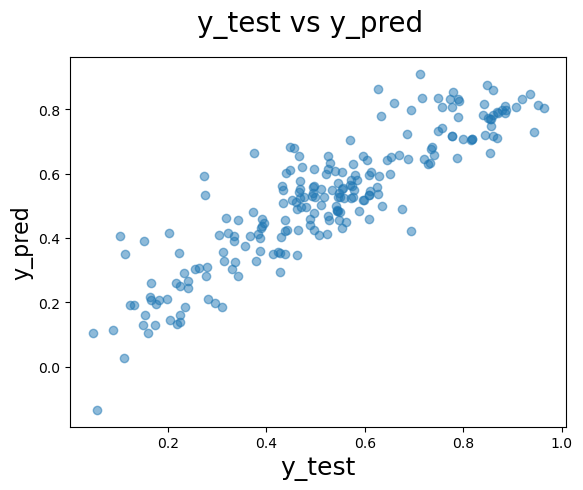

In [305]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m5, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

### Interepretation of results
After analyzing the model, the company should prioritize the following features:

* Expanding business during the month of September
* Anticipating a surge in the number of users once the situation returns to normal, in comparison to 2019, based on previous data
* Expecting a decrease in bookings during light snow or rain, which can be used as an opportunity to service the bikes without affecting business.
